## Article source: [Some study notes on machine learning algorithms — The series](https://medium.com/comunidadeds/some-study-notes-on-machine-learning-algorithms-the-series-cd7549746f86)

### How new points are classified?

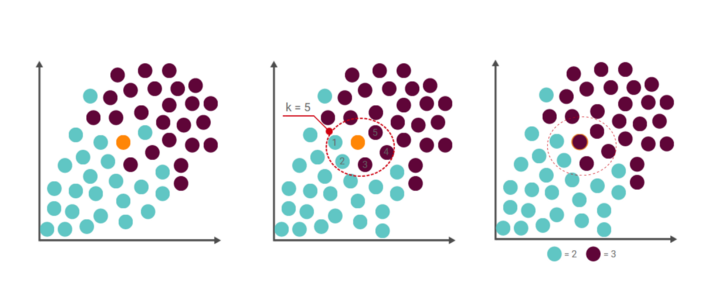

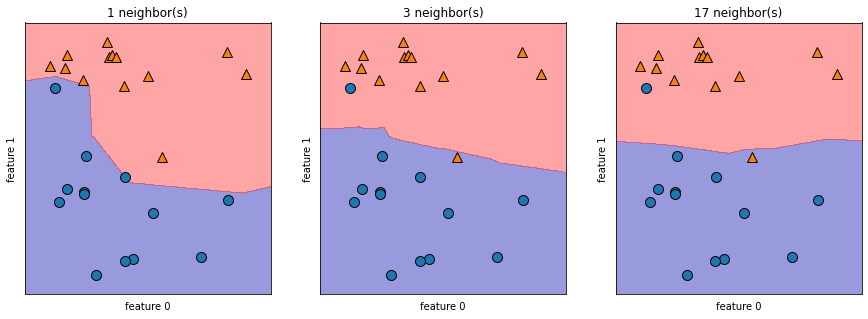

In [6]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import mglearn

X,y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=2187)
fig, axes = plt.subplots(1, 3, figsize=(15,5))

for n_neighbors, ax in zip([1,3,17],axes):
    clf=KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train,y_train)
    mglearn.plots.plot_2d_separator(clf,X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title(f"{n_neighbors} neighbor(s)")
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
    

In [7]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Create pipeline steps
steps = [("knn", KNeighborsClassifier())]

# Instantiate the pipeline 
pipe = Pipeline(steps=steps)

# Create params for the cv - k 
params = {}
params['knn__n_neighbors'] = [1,5,405]

grid = GridSearchCV(pipe,params,scoring='f1', cv=5, return_train_score=True)

grid.fit(X,y)

# get the results from the gridsearch
pd.DataFrame(grid.cv_results_)[['param_knn__n_neighbors', 
                                'mean_train_score', 
                                'mean_test_score']].sort_values('param_knn__n_neighbors').rename(columns={'param_knn__n_neighbors':'k'})


,k,mean_train_score,mean_test_score
0,1,1.000000,0.925747
1,5,0.958639,0.943823
2,405,0.771058,0.771052
